In [2]:
import os
from openai import OpenAI

os.environ["OPENAI_API_KEY"] = ""

cliente = OpenAI(api_key=os.environ["OPENAI_API_KEY"])

MODELO_TEXTO = "gpt-4o-mini"
MODELO_IMAGEN = "gpt-image-1"


In [3]:
import pandas as pd
from google.colab import files

subidos = files.upload()
nombre_archivo = list(subidos.keys())[0]
print("Archivo subido:", nombre_archivo)

if nombre_archivo.lower().endswith((".xlsx", ".xls")):
    df = pd.read_excel(nombre_archivo)
else:
    df = pd.read_csv(nombre_archivo)

print("Filas:", len(df), " | Columnas:", len(df.columns))
df.head()


Saving dataset_prueba.csv to dataset_prueba.csv
Archivo subido: dataset_prueba.csv
Filas: 10  | Columnas: 4


,cliente,categoria,monto,fecha
0,Ana,Electrónica,120,2024-01-10
1,Luis,Hogar,80,2024-01-11
2,Carla,Ropa,50,2024-01-12
3,Ana,Electrónica,200,2024-02-03
4,Luis,Ropa,70,2024-02-05


In [4]:
print("Columnas:", list(df.columns))
print("\nTipos de datos:")
print(df.dtypes)
print("\nPrimeras 5 filas:")
display(df.head())


Columnas: ['cliente', 'categoria', 'monto', 'fecha']

Tipos de datos:
cliente      object
categoria    object
monto         int64
fecha        object
dtype: object

Primeras 5 filas:


,cliente,categoria,monto,fecha
0,Ana,Electrónica,120,2024-01-10
1,Luis,Hogar,80,2024-01-11
2,Carla,Ropa,50,2024-01-12
3,Ana,Electrónica,200,2024-02-03
4,Luis,Ropa,70,2024-02-05


In [5]:
pregunta = "¿Cuáles fueron mis 3 mejores clientes y qué sugerís para retenerlos?"

contexto = {
    "columnas": list(df.columns),
    "muestra": df.head(5).to_dict(orient="records")
}

instrucciones_sistema = "Sos un analista para pequeños emprendedores en Argentina. Respondé corto y accionable."

respuesta = cliente.responses.create(
    model=MODELO_TEXTO,
    input=[
        {"role": "system", "content": instrucciones_sistema},
        {"role": "user", "content": f"Contexto (compacto): {contexto}\n\nPregunta: {pregunta}\n\nRespondé en 2–4 oraciones claras."}
    ],
    temperature=0.2,
    max_output_tokens=400
)

print(respuesta.output_text)


Tus tres mejores clientes son Ana (monto total: 320), Luis (monto total: 150) y Carla (monto total: 50). Para retenerlos, considera implementar un programa de fidelización que ofrezca descuentos exclusivos o promociones personalizadas. Además, mantén una comunicación constante y solicita su feedback para mejorar la experiencia de compra.


Código recibido (crudo):

```python
df_grouped = df.groupby('categoria')['monto'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='monto', ascending=False)

plt.bar(df_grouped['categoria'], df_grouped['monto'], color='skyblue')
plt.title('Total Monto por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Monto Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('grafico.png', dpi=180)
plt.close()
```

Código limpio a ejecutar:

df_grouped = df.groupby('categoria')['monto'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='monto', ascending=False)

plt.bar(df_grouped['categoria'], df_grouped['monto'], color='skyblue')
plt.title('Total Monto por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Monto Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('grafico.png', dpi=180)
plt.close()


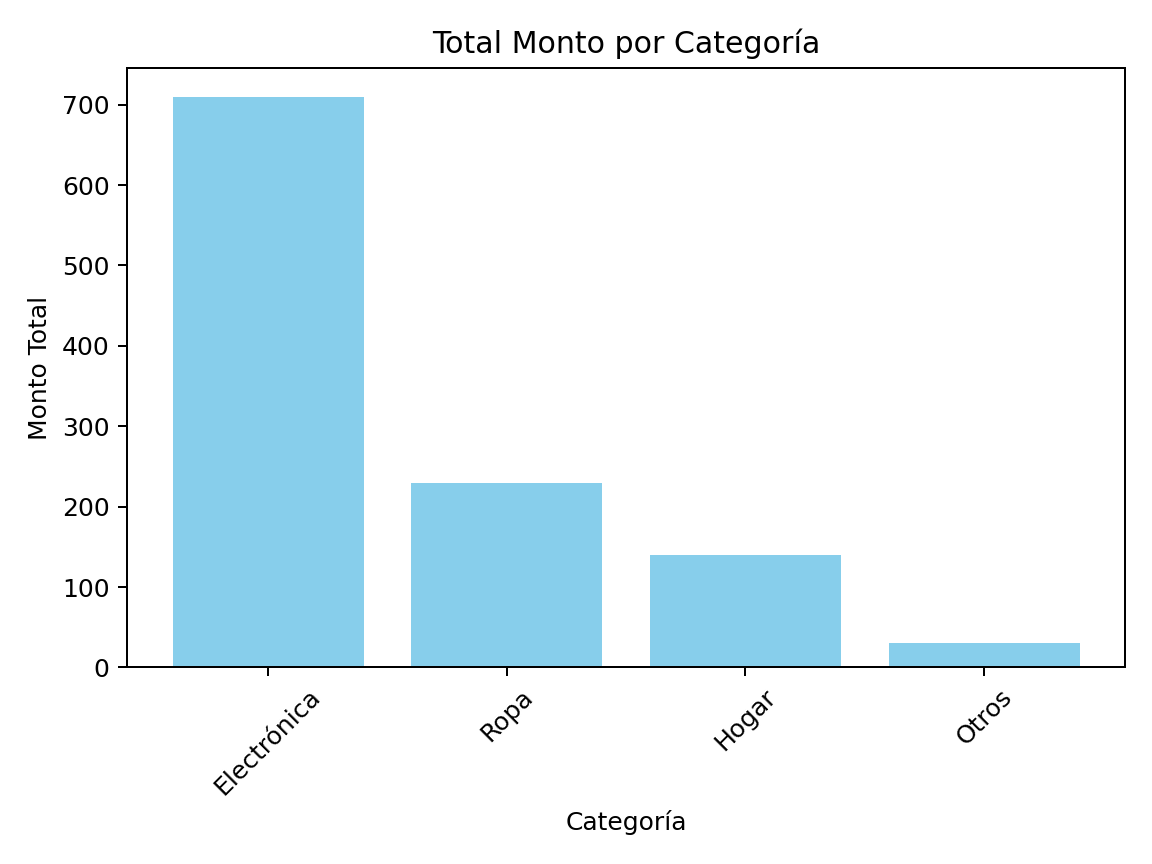

In [7]:
import matplotlib.pyplot as plt
from IPython.display import Image as IPImage, display
import os

objetivo_grafico = "Hacé un gráfico de barras con total de 'monto' por 'categoria', ordenado de mayor a menor. Etiquetas y título claros."

prompt_codigo = f"""
Usá el DataFrame 'df' que ya existe (pandas y matplotlib ya están importados).
PROHIBIDO: crear un nuevo df, importar librerías, imprimir texto o mostrar tablas.
Devolveme SOLO el código Python necesario para:
- agrupar/ordenar según corresponda,
- generar UN gráfico con Matplotlib (plt),
- poner título y etiquetas legibles,
- llamar a plt.tight_layout(),
- guardar como 'grafico.png' con plt.savefig('grafico.png', dpi=180),
- y cerrar con plt.close().

Columnas disponibles: {list(df.columns)}
Primeras filas (solo referencia): {df.head(5).to_dict(orient='records')}
"""

resp_codigo = cliente.responses.create(
    model=MODELO_TEXTO,
    input=[{"role": "user", "content": prompt_codigo}],
    temperature=0.2,
    max_output_tokens=1000
)

codigo = resp_codigo.output_text.strip()
print("Código recibido (crudo):\n")
print(codigo)

if codigo.startswith("```"):
    codigo = codigo.replace("```python", "").replace("```", "").strip()

lineas = []
for linea in codigo.splitlines():
    s = linea.strip()
    if s.startswith("import ") or s.startswith("from "):
        continue
    if "pd.DataFrame" in s or s.startswith("df ="):
        continue
    lineas.append(linea)
codigo_limpio = "\n".join(lineas).strip()

print("\nCódigo limpio a ejecutar:\n")
print(codigo_limpio)

entorno_ejecucion = {"df": df, "pd": pd, "plt": plt}
exec(codigo_limpio, entorno_ejecucion)

assert os.path.exists("grafico.png"), "No se generó grafico.png. Revisá el código."
display(IPImage("grafico.png"))



In [12]:
import os, base64, io
from PIL import Image
from IPython.display import Image as IPImage, display

assert os.path.exists("grafico.png"), "No se encontró grafico.png; corré la Celda 6 primero."

prompt_reestilizado = """
Convierte esta imagen de gráfico en una INFOGRAFÍA profesional y estética.
Requisitos:
- Mantener EXACTAS las etiquetas, categorías y porcentajes del gráfico base.
- Agregar TÍTULO grande (ej.: “Distribución por Categorías – Ventas”)
  y SUBTÍTULO (ej.: “Datos del período analizado”).
- Incluir LEYENDA con íconos simples y tipografía sans-serif clara.
- Añadir 2–3 LLAMADAS breves (insights) en forma de “callouts”,
  sin inventar datos ni cambiar colores/etiquetas clave.
- Composición limpia: márgenes amplios y jerarquía visual clara.
"""

with open("grafico.png", "rb") as f:
    resultado = cliente.images.edit(
        model=MODELO_IMAGEN,
        image=f,
        prompt=prompt_reestilizado,
        size="1024x1024"
    )

b64 = resultado.data[0].b64_json
bytes_imagen = base64.b64decode(b64)
Image.open(io.BytesIO(bytes_imagen)).save("infografia.png")

display(IPImage("infografia.png"))

PermissionDeniedError: Error code: 403 - {'error': {'message': 'Your organization must be verified to use the model `gpt-image-1`. Please go to: https://platform.openai.com/settings/organization/general and click on Verify Organization. If you just verified, it can take up to 15 minutes for access to propagate.', 'type': 'invalid_request_error', 'param': None, 'code': None}}